In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid
from scipy.integrate import trapezoid

# Onset of densification
##### 1. The onset strain of densification is defined as the intersection between the tangents of the densification regime and the stress plateau.
##### 2. The onset strain of densification is defined as the last local minima before densification.
##### 3. The onset strain of densification is defined as where the slope of the tangent is equal that of the elastic regime.
##### 4. Efficiency parameter -> onset of densification is where the derivative of the efficiency is equal to zero -> either GM or LLM

In [19]:
# 4. Efficency parameter calculation

def efficiency(F, L): # Returns efficiency as a function of displacement, onset of max efficiency and index of max efficiency
    integral = cumulative_trapezoid(F, L, initial=0)
    eff = np.divide(integral, F, out=np.zeros_like(integral), where=F!=0) 

    max_eff_index = np.argmax(eff)  # Index of max efficiency
    L_onset = L[max_eff_index] # Displacement at max efficiency 

    return eff, L_onset, max_eff_index

# Spesific energy absorption (SEA)

In [20]:

def SEA(F,L,max_eff_index, mass):
    integral = trapezoid(F[:max_eff_index], L[:max_eff_index]) # integral of force displacement curve 
    return integral/mass

# Tests

In [21]:
mass_M_lattice = 0.01652376
mass_L_lattice = 0.026656179

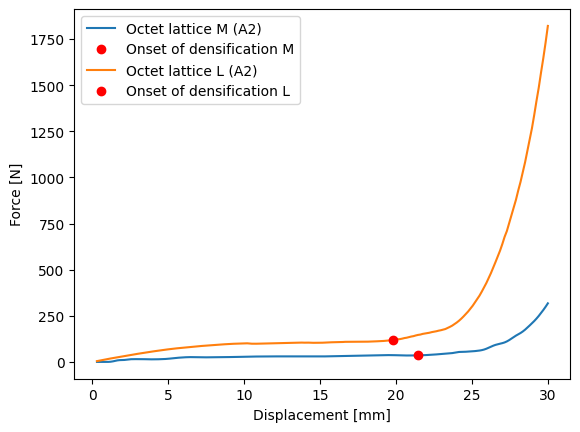

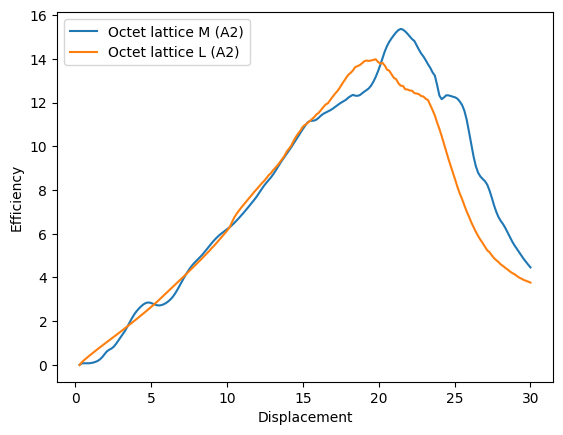

SEA A2 M: 32465.103047381686
SEA A2 L: 61379.114312812984


In [27]:
#A2: Octet lattice with medium size struts, Hex elements
# Total time = 1, Velocity = -30, Material model = Neo Hooke, Mass scaling = no

# MEDIUM STRUTS
A2_data = np.genfromtxt('F-U-A2.rpt',delimiter='', skip_header=5)
U_A2 = A2_data[:,0]
F_A2 = A2_data[:,1]

eff_A2, L_onset_A2, max_eff_index_A2 = efficiency(F_A2, U_A2)
sea_A2 = SEA(F_A2,U_A2,max_eff_index_A2, mass_M_lattice)

#LARGE STRUTS
A2_L_data = np.genfromtxt('F-U-A2-L.rpt',delimiter='', skip_header=5)
U_A2_L = A2_L_data[:,0]
F_A2_L = A2_L_data[:,1]

eff_A2_L, L_onset_A2_L, max_eff_index_A2_L = efficiency(F_A2_L, U_A2_L)
sea_A2_L = SEA(F_A2_L,U_A2_L,max_eff_index_A2_L, mass_L_lattice)

plt.plot(U_A2, F_A2, label = 'Octet lattice M (A2)')
plt.plot(U_A2[max_eff_index_A2], F_A2[max_eff_index_A2], 'ro', label = 'Onset of densification M')
plt.plot(U_A2_L, F_A2_L, label = 'Octet lattice L (A2)')
plt.plot(U_A2_L[max_eff_index_A2_L], F_A2_L[max_eff_index_A2_L], 'ro', label = 'Onset of densification L')
plt.xlabel('Displacement [mm]')
plt.ylabel('Force [N]')
plt.legend()
plt.show()

plt.plot(U_A2, eff_A2, label = 'Octet lattice M (A2)')
plt.plot(U_A2_L, eff_A2_L, label = 'Octet lattice L (A2)')
plt.xlabel('Displacement')
plt.ylabel('Efficiency')
plt.legend()
plt.show()

print('SEA A2 M:', sea_A2)

print('SEA A2 L:', sea_A2_L)


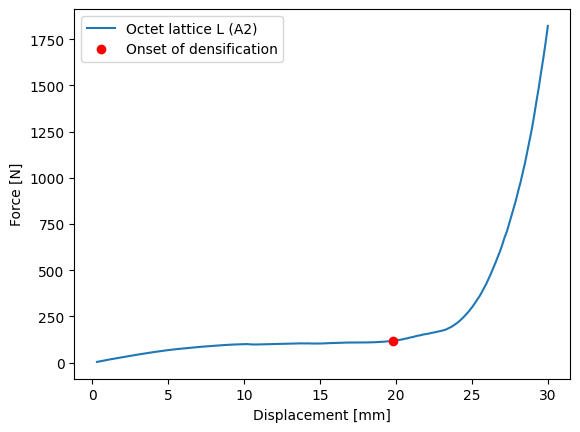

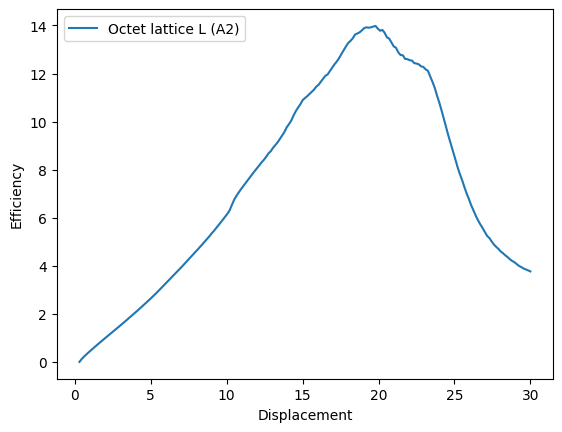

SEA A2 L: 61379.114312812984
